Initially, six clusters were selected based on key attributes. Visual inspection of the resulting plots suggested significant overlap between clusters 0, 3, and 5, and also between 1 and 4. Notably, cluster 2 appeared distinct. This initial observation hinted at three being the optimal number of clusters.However, to validate this hypothesis objectively, two quantitative methods will be employed: the elbow method and the Silhouette Coefficient method.</span> </br>

/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_16234/763202624.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme
/tmp/ipykernel_16234/763202624.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all poi

/tmp/ipykernel_16234/763202624.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')
/tmp/ipykernel_16234/763202624.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')
/tmp/ipykern

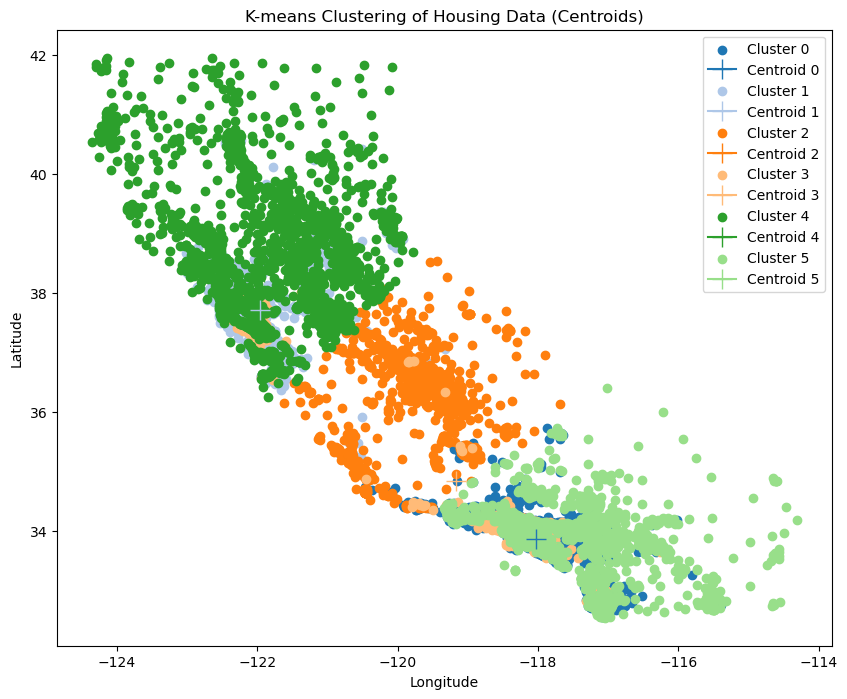

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset named 'housing.csv'
housing_data = pd.read_csv('/mnt/a/UO/1 _ WINTER _ 2024/1 _  IAI5101 _ FOUNDATION OF ML FOR SCI. AND ENG/Assignment 1/Assignment 1/housing.csv')  

# Select the relevant columns (MedInc, Longitude, Latitude)
selected_columns = ['MedInc', 'Longitude', 'Latitude']
X = housing_data[selected_columns]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
housing_data['cluster'] = kmeans.labels_

# Retrieve centroids
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 8))

# Set different colors for clusters
colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme

for cluster_label in range(k):
    # Plot cluster points
    cluster_data = housing_data[housing_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')

    # Plot centroid (adjusted for scaled data)
    centroid_scaled = centroids[cluster_label]
    centroid_real = scaler.inverse_transform([centroid_scaled])[0]  # Inverse transform
    plt.plot(centroid_real[1], centroid_real[2], marker='+', markersize=15, color=colors[cluster_label], label=f'Centroid {cluster_label}')

plt.title('K-means Clustering of Housing Data (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


The elbow method's output curve, which is the result of running the following cell, presents a challenge in pinpointing the elbow point among 2, 3, and 4 clusters. To gain a clearer perspective, the preceding code segment is reiterated for 2, 3, and 4 clusters. Upon examination, it becomes apparent that the most favorable outcomes, characterized by well-distributed clusters around centroids with minimal overlap, occur for 2 clusters (identified as the elbow point). Subsequently, to substantiate this observation, the Silhouette Coefficient is computed in the subsequent section.</br>

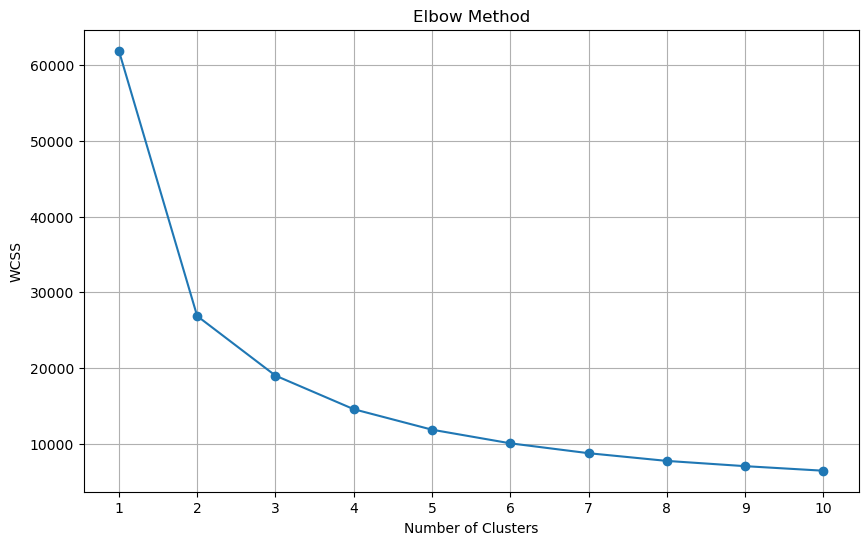

In [86]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_16234/653184860.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme
/tmp/ipykernel_16234/653184860.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all poi

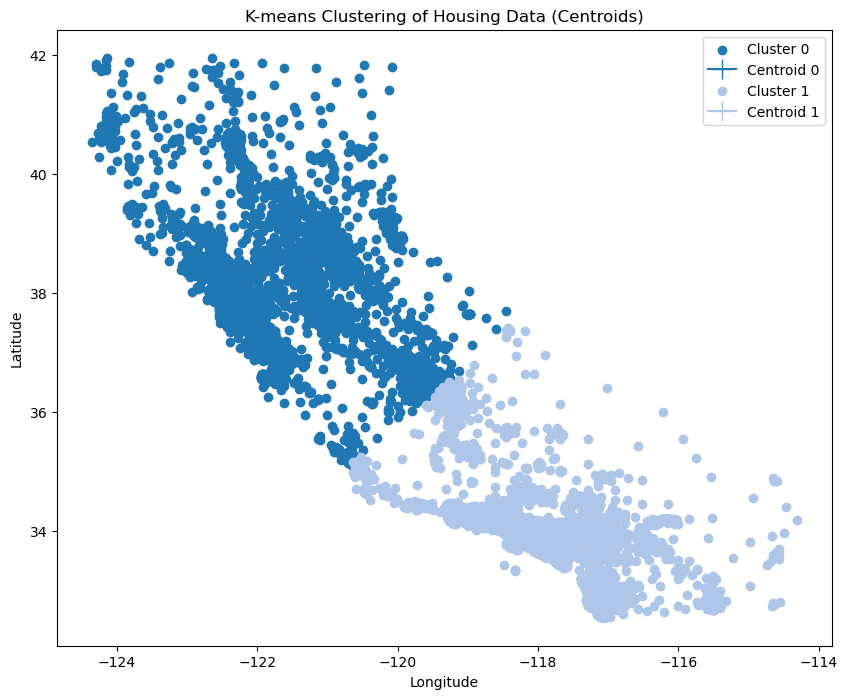

In [87]:
# Load the dataset named 'housing.csv'
housing_data = pd.read_csv('/mnt/a/UO/1 _ WINTER _ 2024/1 _  IAI5101 _ FOUNDATION OF ML FOR SCI. AND ENG/Assignment 1/Assignment 1/housing.csv')  

# Select the relevant columns (MedInc, Longitude, Latitude)
selected_columns = ['MedInc', 'Longitude', 'Latitude']
X = housing_data[selected_columns]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
housing_data['cluster'] = kmeans.labels_

# Retrieve centroids
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 8))

# Set different colors for clusters
colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme

for cluster_label in range(k):
    # Plot cluster points
    cluster_data = housing_data[housing_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')

    # Plot centroid (adjusted for scaled data)
    centroid_scaled = centroids[cluster_label]
    centroid_real = scaler.inverse_transform([centroid_scaled])[0]  # Inverse transform
    plt.plot(centroid_real[1], centroid_real[2], marker='+', markersize=15, color=colors[cluster_label], label=f'Centroid {cluster_label}')

plt.title('K-means Clustering of Housing Data (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_16234/1750730810.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme
/tmp/ipykernel_16234/1750730810.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all p

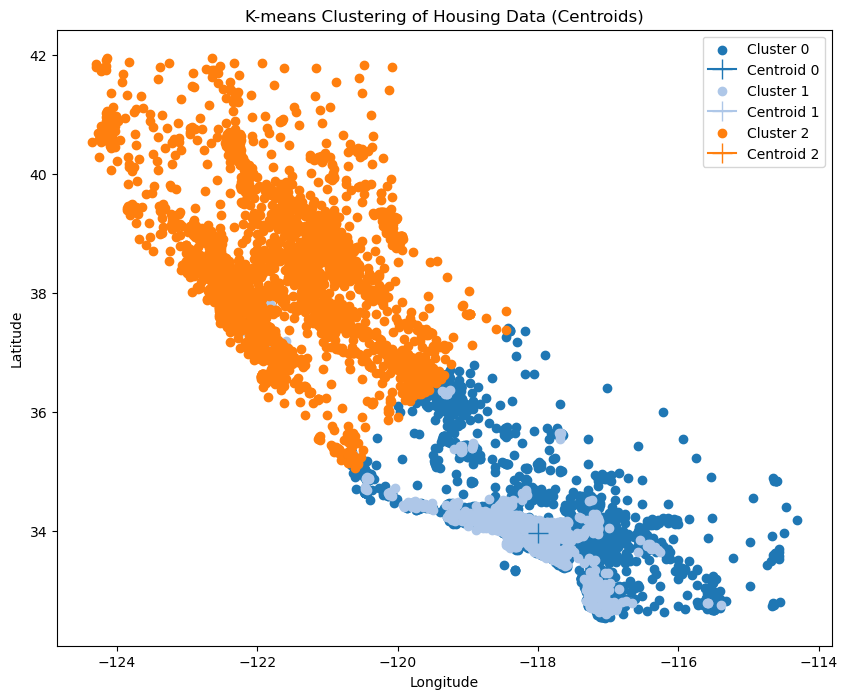

In [88]:
# Load the dataset named 'housing.csv'
housing_data = pd.read_csv('/mnt/a/UO/1 _ WINTER _ 2024/1 _  IAI5101 _ FOUNDATION OF ML FOR SCI. AND ENG/Assignment 1/Assignment 1/housing.csv')  

# Select the relevant columns (MedInc, Longitude, Latitude)
selected_columns = ['MedInc', 'Longitude', 'Latitude']
X = housing_data[selected_columns]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
housing_data['cluster'] = kmeans.labels_

# Retrieve centroids
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 8))

# Set different colors for clusters
colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme

for cluster_label in range(k):
    # Plot cluster points
    cluster_data = housing_data[housing_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')

    # Plot centroid (adjusted for scaled data)
    centroid_scaled = centroids[cluster_label]
    centroid_real = scaler.inverse_transform([centroid_scaled])[0]  # Inverse transform
    plt.plot(centroid_real[1], centroid_real[2], marker='+', markersize=15, color=colors[cluster_label], label=f'Centroid {cluster_label}')

plt.title('K-means Clustering of Housing Data (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_16234/703726145.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme
/tmp/ipykernel_16234/703726145.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all poi

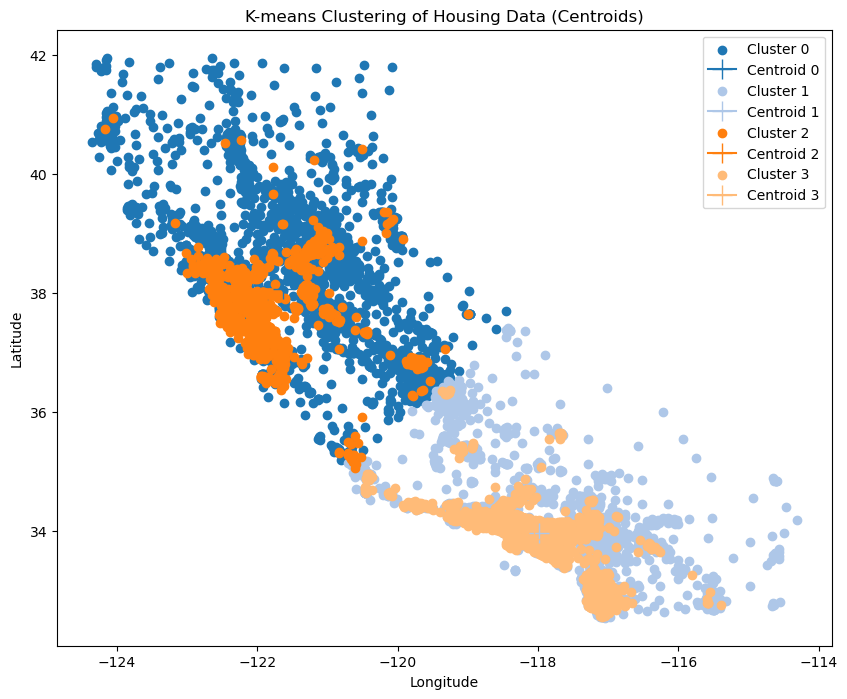

In [89]:
# Load the dataset named 'housing.csv'
housing_data = pd.read_csv('/mnt/a/UO/1 _ WINTER _ 2024/1 _  IAI5101 _ FOUNDATION OF ML FOR SCI. AND ENG/Assignment 1/Assignment 1/housing.csv')  

# Select the relevant columns (MedInc, Longitude, Latitude)
selected_columns = ['MedInc', 'Longitude', 'Latitude']
X = housing_data[selected_columns]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
housing_data['cluster'] = kmeans.labels_

# Retrieve centroids
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 8))

# Set different colors for clusters
colors = plt.cm.get_cmap('tab20').colors  # Or choose your preferred color scheme

for cluster_label in range(k):
    # Plot cluster points
    cluster_data = housing_data[housing_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster_label], label=f'Cluster {cluster_label}')

    # Plot centroid (adjusted for scaled data)
    centroid_scaled = centroids[cluster_label]
    centroid_real = scaler.inverse_transform([centroid_scaled])[0]  # Inverse transform
    plt.plot(centroid_real[1], centroid_real[2], marker='+', markersize=15, color=colors[cluster_label], label=f'Centroid {cluster_label}')

plt.title('K-means Clustering of Housing Data (Centroids)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


The code provided in the following cell calculates the Silhouette Coefficient. The resulting curve indicates that the optimal number of clusters is 2, corresponding to the highest Silhouette Coefficient value (0.55). This finding verifies the hypothesis established in the previous section.</br>

/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

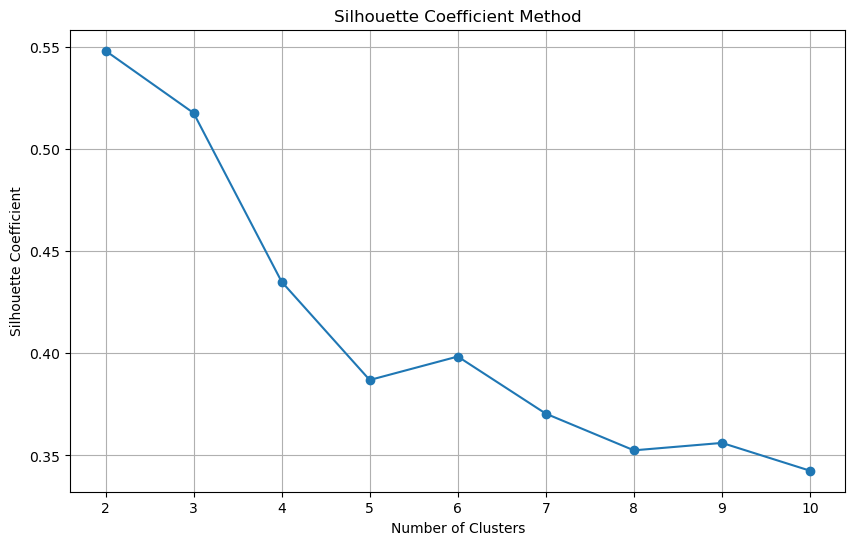

In [90]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Coefficient for different values of k
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()